# Calculation of Singular Value Decomposition (SVD) of Matrix  :

- Implemnt **Jacobi Method** : Eigenvalues and Eigenvectors.\
  For the purpose of finding [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) of given matrix.



- Useful References::
  [References1](https://www.patnauniversity.ac.in/e-content/science/physics/MScPhy58.pdf)
  [References2](https://en.wikipedia.org/wiki/Jacobi_eigenvalue_algorithm)

In [1]:
# import section
import numpy as np
import math
import copy
from time import time

### Input data: 
Samples of input data:

In [2]:
input_matrix = np.array([[4,-30,60,-35], [-30,300,-675,420], [60,-675,1620,-1050], [-35,420,-1050,700]], dtype = float)
# input_matrix = np.array([[1, math.sqrt(2), 2], [math.sqrt(2), 3, math.sqrt(2)], [2, math.sqrt(2), 1]], dtype = float)
# input_matrix = np.array([[1, 2, 7], [2, 5, 1], [7, 1, 6]], dtype = float)
# input_matrix = np.array([[1, 2], [2, 4]], dtype = float)
# input_matrix = np.array([[2, 0], [0, 3]], dtype = float)

In [3]:
input_matrix

array([[    4.,   -30.,    60.,   -35.],
       [  -30.,   300.,  -675.,   420.],
       [   60.,  -675.,  1620., -1050.],
       [  -35.,   420., -1050.,   700.]])

### Read input file: 

Read matrix from **Input_matrix.txt** and convert it to numpy array.

In [4]:
def read_file(file_name):
    with open(file_name, 'r') as f:
        matrix = [[float(num) for num in line.split(',')] for line in f]
#     matrix = np.array(matrix)
    matrix = np.asarray(matrix,dtype=float)
    return matrix

In [5]:
# input_matrix = read_file('Input_matrix.txt')   
print("Input Matrix = \n",input_matrix)
print("\nInput Matrix Shape =",np.shape(input_matrix))

# input_matrix = input_matrix.T @ input_matrix
np.shape(input_matrix)

Input Matrix = 
 [[    4.   -30.    60.   -35.]
 [  -30.   300.  -675.   420.]
 [   60.  -675.  1620. -1050.]
 [  -35.   420. -1050.   700.]]

Input Matrix Shape = (4, 4)


(4, 4)

In [6]:
def vec_norm(v):
    return math.sqrt(np.dot(v.T, v))

### find_max_num
- method find the largest absolute value off-diagonal element, and return his index and value.
- The given matrix is **symmetric**, so only need to search in the upper triangular matrix.

In [7]:
def find_max_num(input_matrix):
#   initialize values:
    max_val = abs(input_matrix[0,1])
    ret_values = (0, 1, max_val)
    
    for i,l1 in enumerate(input_matrix):
        for j, num in enumerate(l1[i+1:]):
            j = j + i + 1
            if abs(num) > max_val:
                max_val = abs(num)
                ret_values = (i, j, max_val)
    return ret_values

### calce_J_matrix
method find the rotation matrix that called J.

In [8]:
def calce_J_matrix(A, p, q):
    
#     alocation new identity matrix:
    n= len(A)
    J = np.eye(n) 
    
#     calculate theta:
    if A[q,q] == A[p,p]:
        theta = math.pi / 4
    else:
        a = (2*A[p,q]) / (A[q,q] - A[p,p])
        theta = 0.5 * math.atan(a)

    
#     insert new values to different places in the matrix J:
    J[p,p] = J[q,q] = cosinus = math.cos(theta)
    J[q,p] = sin = math.sin(theta)
    J[p,q] = -1 * math.sin(theta)
    
    return J, cosinus, sin

In [9]:
# calce_J_matrix(input_matrix, find_max_num(input_matrix)[0], find_max_num(input_matrix)[1])

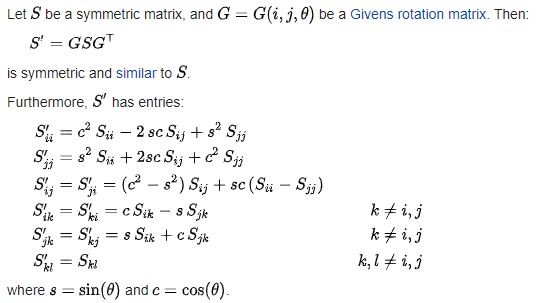

- **Explanation:**

For make the performention of Jacobi eigenvalue Algorithm better, 

matrix multiplication of $J^T * A * J$ is replaced by some elementary operations.

Then, the all function performance become
$O(n)$ instead of $O(n^2)$.

In [10]:
def calc_matrix(mtx, cos, sin, i, j):
    S = np.copy(mtx)
    
    a_ii = mtx[i, i]
    a_ij = mtx[i, j]
    
    a_jj = mtx[j, j]
    a_ji = mtx[j, i]
    
    S[i, i] = (cos ** 2) * a_ii - 2*sin*cos*a_ij + (sin ** 2)*a_jj
    S[j, j] = (sin ** 2) * a_ii + 2*sin*cos*a_ij + (cos ** 2)*a_jj
    S[i, j] = S[j, i] = ((cos ** 2) - (sin ** 2))*a_ij + sin*cos*(a_ii - a_jj)
    
    for k in range(len(S)):
        if k != i and k != j:
            S[i, k] = S[k, i] = cos * mtx[i, k] - sin * mtx[j, k]
            S[j, k] = S[k, j] = sin * mtx[i, k] + cos * mtx[j, k]
            
    return S

### check_and_update
method is doing the following things:
- Convert numpy array elemnt that is smaller than total ( almost equal to $0$ ) to be $0$.
- Check if the given matrix is diagonal.

In [11]:
def check_and_update(A, total = 1.0e-9):
    isDiagonalMatrix = True
    
    for i, l in enumerate(A):
        for j,num in enumerate(l[i+1:]):
#             Check the upper triangular matrix values only
            j = j + i + 1
#           The case the value is almost 0:
            if abs(num) < total:
                A[i,j] = A[j, i] = 0
            else:
                return False
    
    return isDiagonalMatrix

### Jacobi
method Implemnt [Jacobi Method](https://en.wikipedia.org/wiki/Jacobi_eigenvalue_algorithm).
- The method return Eigenvalues and Eigenvectors.

In [12]:
def Jacobi(A, total = 1.0e-9):
    
#     Initialize of the variables:
    mtx = copy.deepcopy(A)
    n = len(mtx)
    J = np.eye(n)
    
    
#     Set limit on the number of iteration:
    max_iterations = 100
    cur_iteration_num = 0
    
    for i in range(max_iterations):

        p, q, max_val = find_max_num(mtx)
        
        if max_val < total: 
            return J, np.diag(mtx), cur_iteration_num
        
        J1, cos, sin = calce_J_matrix(mtx, p, q)
        mtx = calc_matrix(mtx, cos, sin, p, q)
        J = np.dot(J, J1)
                
        cur_iteration_num += 1
        
        if check_and_update(mtx, total):
            break
        
    
    return J, np.diag(mtx), cur_iteration_num

In [13]:
# eigenvectors, eigenvalues, _ = Jacobi(input_matrix)
# print("Input Matrix = \n{}".format(input_matrix))
# print("Eigenvectors = \n", eigenvectors)
# print("Eigenvalues = \n", eigenvalues)

### rearrange
method remove negative and zero Eigenvalues and their Eigenvectors.

- The method return Sorted list, of Eigenvalues and their Eigenvectors.

In [14]:
def rearrange(vecs, lamda):    
    
#     Initialize of the variables:
    t_lst = []
    flag = False

    for i, λ in enumerate(lamda):
        if λ > 0:
            t = (λ, vecs[:,i])
            if len(t_lst) == 0:
                t_lst.append(t)
            else:
                for index, temp in enumerate(t_lst):
                    if temp[0] <= λ:
                        t_lst.insert(index, t)
                        flag = True
                        break      
                if not flag:
                    t_lst.append(t)
                
                
    return t_lst

In [15]:
# rearrange(eigenvectors, eigenvalues)

### SVD
- This method get input matrix and perfome Singular Value Decomposition **(SVD)**.

In [16]:
def SVD(input_matrix):
    A = copy.deepcopy(input_matrix)
    
    AT_A = np.dot(A.T, A)
    
    eigenvectors, eigenvalues, _ = Jacobi(AT_A)
    t_lst = rearrange(eigenvectors, eigenvalues)
    
#     Build Sigma matrix - contain the Singular Values in descending order on the main diagonal:

    Sigma = None
    
#     Build U matrix - (1 / Singular Values)*A*V

    U = None
    
#     Build V.T matrix - contain the transpose of the eigenvectors.

    V_T = None
    
    for index, values in enumerate(t_lst):
        
        s = math.sqrt(values[0])
       
        v = (1/vec_norm(values[1]))*values[1]
        
        u = (1 / s)*np.dot(A, v)
        
        if index == 0:
            
            Sigma = np.array([s],dtype = float)
#             print("Sigma = \n",Sigma)
            
            U = np.array([u],dtype = float)
#             print("U = \n", U)
            
            V_T = np.array([v],dtype = float)   
#             print("V_T = \n",V_T)
            
        else:
            Sigma = np.append(Sigma, [s], axis=0)
#             print("Sigma = \n",Sigma)
            
            U = np.append(U, [u], axis=0)
#             print("U = \n", U)
            
            V_T = np.append(V_T, [v], axis=0)
#             print("V_T = \n",V_T)

    U = U.T
    return U, Sigma, V_T

### Print our SVD:

In [17]:
print("Print our SVD:")
start = time()
u, s, vt = SVD(input_matrix)
print("U = \n", u, "\n", "S = \n", s, "\n", "V.T = \n",vt)
print("Time = {}".format(time() - start))

Print our SVD:
U = 
 [[ 7.54065860e-03 -1.78358761e+00 -7.77502121e+00  1.74946683e+02]
 [-8.45454672e-02  1.96363196e+01  1.17467966e+02 -2.02825769e+03]
 [ 2.00407139e-01 -4.66841185e+01 -3.19807720e+02  5.00003675e+03]
 [-1.28292508e-01  3.01120288e+01  2.22968285e+02 -3.30523069e+03]] 
 S = 
 [2.58525381e+03 3.71014914e+01 1.47805484e+00 1.66642862e-01] 
 V.T = 
 [[-0.02918591  0.32874127  0.79138951  0.51456778]
 [ 0.17905662  0.74532157 -0.53449131  0.3560246 ]
 [ 0.58211473 -0.5308878  -0.14689179  0.59809981]
 [ 0.7926092   0.23363021  0.25776828 -0.50074254]]
Time = 0.007385730743408203


### Print SVD made by numpy library:

In [18]:
print("Print NumPy SVD:")
start = time()
numpy_u, numpy_s, numpy_vt = np.linalg.svd(input_matrix)
print("U = \n", numpy_u, "\n", "S = \n", numpy_s, "\n", "V.T = \n",numpy_vt)
print("Time = {}".format(time() - start))

Print NumPy SVD:
U = 
 [[-0.02919332  0.17918629  0.5820757   0.79260829]
 [ 0.32871206 -0.74191779 -0.37050219  0.45192312]
 [-0.79141115  0.10022814 -0.50957863  0.3224164 ]
 [ 0.51455275  0.63828253 -0.51404827  0.25216117]] 
 S = 
 [2.58525381e+03 3.71014914e+01 1.47805484e+00 1.66642861e-01] 
 V.T = 
 [[-0.02919332  0.32871206 -0.79141115  0.51455275]
 [ 0.17918629 -0.74191779  0.10022814  0.63828253]
 [ 0.5820757  -0.37050219 -0.50957863 -0.51404827]
 [ 0.79260829  0.45192312  0.3224164   0.25216117]]
Time = 0.0039904117584228516


### Program Performance Assessment
- Checking that the $U * S * V^T$ is equal to input matrix.


In [19]:
print("Examination Of The Decomposition:\n")
print("Input matrix = \n{}".format(input_matrix),end="\n\n")

u, s, vt = SVD(input_matrix)

res = u @ np.diag(s) @ vt

print("Result Of The 3 Matrix Multiplication From SVD Is:\nU*S*V.t =\n{}".format(res))

Examination Of The Decomposition:

Input matrix = 
[[    4.   -30.    60.   -35.]
 [  -30.   300.  -675.   420.]
 [   60.  -675.  1620. -1050.]
 [  -35.   420. -1050.   700.]]

Result Of The 3 Matrix Multiplication From SVD Is:
U*S*V.t =
[[    4.   -30.    60.   -35.]
 [  -30.   300.  -675.   420.]
 [   60.  -675.  1620. -1050.]
 [  -35.   420. -1050.   700.]]
